In [1]:
%load_ext rpy2.ipython
from IPython.display import HTML
HTML('''<script>
var code_show_err = false;
var code_toggle_err = function() {
    var stderrNodes = document.querySelectorAll('[data-mime-type="application/vnd.jupyter.stderr"]')
    var stderr = Array.from(stderrNodes)
    if (code_show_err){
        stderr.forEach(ele => ele.style.display = 'block');
    } else {
        stderr.forEach(ele => ele.style.display = 'none');
    }
    code_show_err = !code_show_err
}
document.addEventListener('DOMContentLoaded', code_toggle_err);
</script>
To toggle on/off output_stderr, click <a onclick="javascript:code_toggle_err()">here</a>.''')

In [2]:
%%R
library(ggplot2)
library(DESeq2)
library(apeglm)
library(ggrepel)
library(dplyr)
library(org.Mm.eg.db)
library(PCAtools)
library(GEOquery)
library(fgsea)
library(stringr)
library(Seurat)
library(patchwork)
library(Matrix)
library(MAST)
library(umap)
library(limma)

R[write to console]: Загрузка требуемого пакета: S4Vectors

R[write to console]: Загрузка требуемого пакета: stats4

R[write to console]: Загрузка требуемого пакета: BiocGenerics

R[write to console]: 
Присоединяю пакет: ‘BiocGenerics’


R[write to console]: Следующие объекты скрыты от ‘package:stats’:

    IQR, mad, sd, var, xtabs


R[write to console]: Следующие объекты скрыты от ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


R[write to console]: 
Присоединяю пакет: ‘S4Vectors’


R[write to console]: Следующие объекты скрыты от ‘package:base’:

    expand.grid, I, unname


R[write to console]: Загрузка требуемого пакета


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

R[write to console]: Attaching SeuratObject

R[write to console]: 
Присоединяю пакет: ‘Seurat’


R[write to console]: Следующий объект скрыт от ‘package:SummarizedExperiment’:

    Assays


R[write to console]: 
Присоединяю пакет: ‘Matrix’


R[write to console]: Следующий объект скрыт от ‘package:S4Vectors’:

    expand


R[write to console]: Загрузка требуемого пакета: SingleCellExperiment

R[write to console]: 
Присоединяю пакет: ‘limma’


R[write to console]: Следующий объект скрыт от ‘package:DESeq2’:

    plotMA


R[write to console]: Следующий объект скрыт от ‘package:BiocGenerics’:

    plotMA




#  Make a single example

In [3]:
cd split

/Users/pavellebedev/Yandex.Disk.localized/Cloud_project/Project_2/split


In [4]:
%%R
split = read.table('GSE100067-GPL17021_split.txt')

In [5]:
%%R
head(split, n = 1)
rows = split['V4'][1,]
rows3 = split['V5'][1,]
rows2 = str_split_1(rows, '//')
rows4 = str_split_1(rows3, '//')

In [6]:
cd ..

/Users/pavellebedev/Yandex.Disk.localized/Cloud_project/Project_2


In [7]:
%%R
exp = read.csv("expression6.csv")

In [8]:
%%R
str(exp)

'data.frame':	32544 obs. of  9413 variables:
 $ X         : int  0 1 2 3 4 5 6 7 8 9 ...
 $ ensemble  : chr  "missing" "ENSMUSG00000007777" "ENSMUSG00000043644" "missing" ...
 $ symbol    : chr  "0610007P14Rik" "0610009B22Rik" "0610009L18Rik" "0610009O20Rik" ...
 $ GSM1356226: int  3228 1185 114 3548 4075 1425 638 3595 4310 2367 ...
 $ GSM1849922: int  1274 437 35 3126 1033 2156 877 779 4540 1222 ...
 $ GSM1897413: int  114 12 21 95 40 65 52 49 400 152 ...
 $ GSM1262088: int  810 56 11 520 157 862 150 306 2126 1091 ...
 $ GSM1119597: int  440 151 138 254 465 258 278 946 1526 685 ...
 $ GSM1533925: int  117 78 4 112 261 26 21 188 178 184 ...
 $ GSM1511235: int  500 136 46 1954 54 1320 950 1109 1578 211 ...
 $ GSM1808311: int  1425 757 101 1063 1834 925 277 2887 3334 1668 ...
 $ GSM1823626: int  326 237 15 558 948 348 176 494 2268 963 ...
 $ GSM1713923: int  1121 200 44 1140 441 652 946 619 3424 827 ...
 $ GSM1356224: int  716 277 96 547 1720 482 275 1505 1586 1285 ...
 $ GSM814845 : int

In [44]:
%%R
# exp <- as.data.frame(apply(exp, 2, as.numeric))  # Convert all variable types to numeric
exp$Means <-apply(exp,1,mean)
exp = exp[order(exp$Means, decreasing = TRUE),]
exp = exp[1:10000,]
library("dplyr")
exp <-subset(exp, select = -c(Means))

In [9]:
%%R
# create table for coldata in deseq
Comparison <- c(rep("A", length(rows2)), rep("B", length(rows4)))
df <- data.frame(Comparison)
rownames(df) = c(rows2,rows4)
df

           Comparison
GSM2670770          A
GSM2670771          A
GSM2670772          B
GSM2670765          B
GSM2670763          B
GSM2670764          B
GSM2670766          B
GSM2670769          B
GSM2670767          B
GSM2670768          B


In [10]:
%%R
df = factor(df$Comparison)

In [11]:
%%R
design <- model.matrix(~0+Comparison)
counts <- voom(exp[c(rows2,rows4)], design)
fit <- lmFit(counts, design)
fit2 <- contrasts.fit(fit, makeContrasts(ComparisonA-ComparisonB, levels = design))
fit2 <- eBayes(fit2)
res = topTable(fit2, adjust.method = "BH", number=Inf, confint = TRUE)

In [12]:
%%R
head(res$logFC)

[1]  4.904361 -9.851089  5.057015  4.796832 10.436736 -8.186248


# По всем каунтам:
- сырые каунты берем из ARCHS4
- на входпоступаем матрица из строки - гены, колонки - пары сравнения, ячейки - logfoldchange

In [58]:
cd Project_2

/Users/pavellebedev/Yandex.Disk.localized/Cloud_project/Project_2


Что делать
- нормализация  
d0 <- DGEList(expression)  
    d0 <- calcNormFactors(d0)  
- можно voom без дизайна
- делаем voom также с дизайном, но достаем все сэмплы одного датасета - делаем нормализацию, потом оставляет 100000 генов (тем же способом), и дальше все то же, но для этого куска
- и с каждым датасетом нужно этот кусок заменить новым из expression6
- 
    

In [15]:
%%R
exp = read.csv("expression6.csv")
# exp$Means <-apply(exp,1,mean)
# exp = exp[order(exp$Means, decreasing = TRUE),]
# exp = exp[1:10000,]
# library("dplyr")
# exp <-subset(exp, select = -c(Means))
files<-list.files(path='split', pattern='.txt', full.names = FALSE)
for (fileName in files) {   
    folder <- file.path("split")
    path = file.path(folder, fileName)
    skip_to_next <- FALSE
    tryCatch({ 
        split <-  read.table(path)
        for (i in 1:nrow(split)) {
            skip_to_next <- FALSE
            tryCatch({    # miss errors and continue, if samplew are not in exp
                rows = split['V4'][i,]
                rows3 = split['V5'][i,]
                rows2 = str_split_1(rows, '//')
                rows4 = str_split_1(rows3, '//')
                Comparison <- c(rep("A", length(rows2)), rep("B", length(rows4)))
                design <- stats::model.matrix(~0+Comparison)
                counts <- voom(exp[c(rows2,rows4)], design)
                fit <- lmFit(counts, design)
                # fit <- lmFit(exp[c(rows2,rows4)], design)
                fit2 <- contrasts.fit(fit, makeContrasts(ComparisonB-ComparisonA, levels = design))
                fit2 <- eBayes(fit2)
                res = topTable(fit2, adjust.method = "BH", number=Inf, confint = TRUE)
                result = res$logFC   
                rows = str_replace_all(rows, '//', '_')
                rows3 = str_replace_all(rows3, '//', '_')
                result = c( paste0(fileName, "`_", i), result)
                save(result, file = paste0('Limma/', fileName, "_", i, ".rda"))        
        }, error = function(e) { skip_to_next <<- TRUE})
        if(skip_to_next) { next }
            }
    }, error = function(e) { skip_to_next <<- TRUE})
    if(skip_to_next) { next }
    }


## PCA

In [5]:
%%R
library('FactoMineR')
library('ade4')
library('amap')

R[write to console]: 
Присоединяю пакет: ‘ade4’


R[write to console]: Следующий объект скрыт от ‘package:FactoMineR’:

    reconst


R[write to console]: Следующий объект скрыт от ‘package:GenomicRanges’:

    score


R[write to console]: Следующий объект скрыт от ‘package:BiocGenerics’:

    score


R[write to console]: 
Присоединяю пакет: ‘amap’


R[write to console]: Следующий объект скрыт от ‘package:PCAtools’:

    pca




In [95]:
pwd

'/Users/pavellebedev/Yandex.Disk.localized/Cloud_project/Project_2'

### Preparation

In [3]:
%%R 
# read logdoldcgange from folder split
files<-list.files(path='Limma', pattern='.rda', full.names = TRUE)
load('GSE100067-GPL17021_split-Copy3.txt_1.rda')
df <- data.frame(result)
for (file in files) {  
    load(file)
    df <- cbind(df, result)
}
names(df) = df[1, ]
df = df[-c(1), ]

### Optional

In [4]:
%%R 
# if there is arror with missing values

library(Hmisc) #work with missing values
df <- impute(df, fun = 0) # replace missing values

R[write to console]: 
Присоединяю пакет: ‘Hmisc’


R[write to console]: Следующий объект скрыт от ‘package:MAST’:

    impute


R[write to console]: Следующий объект скрыт от ‘package:SeuratObject’:

    Key


R[write to console]: Следующий объект скрыт от ‘package:Seurat’:

    Key


R[write to console]: Следующий объект скрыт от ‘package:AnnotationDbi’:

    contents


R[write to console]: Следующие объекты скрыты от ‘package:dplyr’:

    src, summarize


R[write to console]: Следующий объект скрыт от ‘package:Biobase’:

    contents


R[write to console]: Следующие объекты скрыты от ‘package:base’:

    format.pval, units




In [5]:
%%R 
# without choosing 10 000
df <- as.data.frame(apply(df, 2, as.numeric))

In [13]:
%%R
# with choosing 10 000
df <- as.data.frame(apply(df, 2, as.numeric))  # Convert all variable types to numeric
df$Means <-apply(df,1,mean)
df = df[order(df$Means, decreasing = TRUE),]
df = df[1:10000,]
library("dplyr")
df <-subset(df, select = -c(Means))

### Make pca plot

In [6]:
%%R
df = t(df)

In [7]:
%%R
pca = prcomp(df, center = FALSE, scale = FALSE, na.action = na.omit)

In [ ]:
%%R
str(pca)

$sdev
  [1] 6.373634e+01 3.236601e+01 2.107045e+01 1.635307e+01 1.360522e+01
  [6] 1.217796e+01 1.152365e+01 1.042018e+01 1.028408e+01 1.012022e+01
 [11] 1.007153e+01 9.998100e+00 9.816938e+00 9.464933e+00 9.211591e+00
 [16] 9.031220e+00 8.857940e+00 8.746545e+00 8.589022e+00 8.555448e+00
 [21] 8.401582e+00 8.348619e+00 8.287318e+00 8.269672e+00 8.180638e+00
 [26] 8.161233e+00 8.107986e+00 8.064862e+00 8.029232e+00 7.959471e+00
 [31] 7.922187e+00 7.914461e+00 7.851498e+00 7.833714e+00 7.828725e+00
 [36] 7.781013e+00 7.743024e+00 7.683945e+00 7.645461e+00 7.626702e+00
 [41] 7.575723e+00 7.545160e+00 7.524865e+00 7.516882e+00 7.479898e+00
 [46] 7.455206e+00 7.407257e+00 7.400903e+00 7.392745e+00 7.356817e+00
 [51] 7.329189e+00 7.313141e+00 7.277549e+00 7.264461e+00 7.250253e+00
 [56] 7.237939e+00 7.220012e+00 7.194414e+00 7.148308e+00 7.138431e+00
 [61] 7.119419e+00 7.091316e+00 7.089635e+00 7.059404e+00 7.045862e+00
 [66] 7.029866e+00 7.014265e+00 6.988461e+00 6.968062e+00 6.948982e+00


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  2.040135e-03 -2.191679e-02
   [43,]  1.528461e-04  1.438053e-02 -1.088427e-02 -1.394101e-02 -2.485376e-02
   [44,]  9.907403e-03 -5.739863e-03 -3.441547e-02 -1.306373e-02 -1.595704e-02
   [45,]  2.145506e-02 -4.338032e-03 -1.838196e-02 -7.322598e-03  1.119780e-03
   [46,] -2.168901e-02  7.114975e-03 -2.686595e-02  2.479327e-03 -2.767627e-02
   [47,]  5.015212e-02  2.795764e-02 -1.532549e-02  1.635898e-02 -2.343486e-02
   [48,]  9.742538e-04  7.699421e-03  9.059161e-03  1.101009e-02 -3.370722e-02
   [49,]  5.589933e-03 -1.514532e-02  5.560909e-03 -2.659003e-02  1.555525e-02
   [50,]  2.096614e-03 -5.706199e-02 -9.122707e-03  1.671189e-02  1.122014e-02
   [51,] -1.011633e-03  3.551564e-03 -3.397483e-02  7.445431e-03  1.188126e-02
   [52,] -1.113087e-03  3.303520e-03  9.326503e-03  6.542175e-03 -4.637228e-02
   [53,] -1.697271e-02 -1.193675e-02 -1.049956e-02  3.310131e-02 -3.171898e-03
   [54,]  7.821441e-03 -5.773394e-03  1.811436e-02 -8.017731e-03 -1.856611e-02
   [55,] -3.437417e-03 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 -1.410856e-02 -2.209811e-02  3.177081e-02 -7.576593e-03
    [7,]  5.016396e-02  6.980538e-03  1.713901e-02 -2.621004e-02  1.594503e-02
    [8,]  1.276167e-02 -2.057527e-02  2.247778e-02  3.947511e-03  3.200754e-02
    [9,]  3.766076e-03 -2.436668e-02 -2.315591e-02 -1.237271e-02  2.930145e-03
   [10,]  5.081294e-03  2.711471e-02  3.823562e-03 -1.768381e-02  5.032406e-03
   [11,]  2.862424e-02 -3.707593e-02 -2.539167e-02 -1.130363e-02  2.623070e-02
   [12,] -1.404969e-02 -2.517348e-02 -3.442480e-02 -5.352638e-02  3.958884e-02
   [13,] -3.218586e-02  2.617292e-02  1.527782e-03 -3.689750e-03 -2.957287e-03
   [14,]  3.233217e-02 -2.083999e-02 -7.816689e-03 -1.007702e-02 -2.863432e-02
   [15,] -3.349047e-02  5.259839e-03  3.200744e-04  1.950630e-03 -3.759285e-02
   [16,] -2.586086e-02  1.222348e-02  3.497040e-02  2.736690e-03  2.260677e-02
   [17,] -3.771138e-02 -4.522128e-02 -8.917784e-03  7.889242e-03  9.050748e-03
   [18,] -3.178356e-02 -2.559501e-02  3.031099e-02 -7.899042e-03  2.592428

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  1.961283e-02  6.526333e-04  1.998591e-03
   [83,] -2.253868e-02 -2.820138e-02  1.302920e-02 -2.477478e-02  2.237642e-02
   [84,] -2.842705e-02  7.273828e-03 -4.864578e-03 -3.200361e-02  3.704763e-04
   [85,]  6.406203e-03  4.843170e-03 -3.469307e-02  1.334649e-02 -3.788910e-02
   [86,]  2.928276e-02 -2.583739e-02 -1.558883e-02  4.775293e-03  3.007128e-02
   [87,]  1.837900e-02  2.083022e-02 -1.506172e-02  9.047920e-03 -4.197848e-03
   [88,]  5.051179e-03 -3.836391e-02  1.595205e-02  3.924528e-02  6.404189e-03
   [89,]  1.916995e-02  1.971051e-02 -4.208261e-03  2.142289e-02 -3.972841e-03
   [90,]  3.598497e-03 -1.678328e-03  1.998256e-02  1.163599e-02 -2.127492e-02
   [91,]  2.148551e-02  1.723483e-02  6.195895e-03 -3.739127e-02  2.063569e-02
   [92,]  1.105455e-02  2.461432e-02  1.595330e-02 -1.208590e-02 -3.402182e-03
   [93,]  1.499073e-03  7.918694e-03  2.626598e-02 -2.332664e-02  9.678181e-03
   [94,]  2.006176e-02  1.534376e-02  2.441590e-02 -1.521902e-02 -8.224631e-04
   [95,] 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




   [83,]  1.128977e-02  2.214191e-02 -2.348872e-02  1.791175e-02 -3.083984e-02
   [84,] -4.920685e-03 -2.939656e-02  6.630368e-03  2.339749e-03  1.690756e-02
   [85,]  2.238626e-02 -1.041207e-02  4.886566e-03 -1.047528e-02 -2.277569e-02
   [86,]  9.774187e-03  1.490728e-02  2.458316e-02  3.537472e-02  8.762405e-03
   [87,] -2.725631e-02  3.408392e-02  4.771786e-02  6.062334e-02 -1.065680e-02
   [88,]  4.620770e-03 -2.177042e-02 -2.596974e-02  6.554160e-03 -1.579594e-04
   [89,]  1.428342e-02  2.259989e-02 -1.535393e-02 -2.762828e-02 -2.565495e-02
   [90,] -4.982100e-02 -2.947192e-02 -6.716364e-03  1.338800e-02 -1.075037e-03
   [91,] -3.279999e-03 -3.435691e-02 -2.313380e-03 -2.298853e-02  4.087849e-03
   [92,] -1.016749e-02  7.011939e-03  1.986011e-02  4.027052e-02 -3.060875e-02
   [93,] -4.139963e-03 -8.187275e-03  1.387695e-02  1.084318e-02  5.978725e-03
   [94,] -1.902374e-02  1.552890e-02  5.612521e-03  8.681271e-03  3.192469e-02
   [95,]  5.855010e-03  2.077825e-02 -3.021894e-02 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  5.306536e-02  1.979243e-02 -3.730918e-02  1.379251e-02  8.593245e-03
   [86,]  2.603018e-02 -6.300665e-03 -2.124898e-02 -2.896672e-02  1.411633e-02
   [87,]  1.960223e-02 -6.444936e-03 -7.547986e-03  2.803357e-02  1.504807e-02
   [88,] -1.448592e-02  1.253959e-02  1.165110e-02 -1.239200e-02  1.257306e-02
   [89,]  2.316469e-02  2.909183e-02 -9.883222e-03  2.119506e-03 -1.296650e-02
   [90,]  1.350544e-02  1.723093e-02 -2.366439e-02 -2.078022e-02 -2.819803e-02
   [91,] -8.107526e-03 -2.008738e-03  1.024968e-03 -1.560734e-02  4.579143e-02
   [92,]  2.133729e-02  1.832118e-02  2.024673e-02 -2.965584e-02 -3.050398e-02
   [93,] -5.355466e-03  1.007715e-02  4.262068e-03 -3.778366e-03 -1.994722e-02
   [94,]  7.883165e-03 -2.369095e-02  2.470406e-02  1.285890e-02 -6.433790e-03
   [95,]  1.917519e-02  7.675864e-04  1.660938e-02 -4.262772e-03  1.517149e-02
   [96,]  3.252648e-02  2.583130e-03  2.769327e-03 -1.212447e-02  1.120735e-02
   [97,]  1.199666e-02  1.308655e-02  7.861512e-03  1.848140

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




   [10,]  1.001067e-02 -1.363738e-02  5.326057e-03  3.112940e-02 -1.520131e-02
   [11,]  1.516230e-02 -1.955533e-02 -1.134603e-02 -1.710362e-02 -3.990628e-03
   [12,]  1.419169e-02  1.678896e-02 -1.397523e-02 -1.898377e-02  1.663715e-03
   [13,] -5.586289e-02  2.562470e-03  1.040539e-02 -1.604430e-02 -3.937043e-02
   [14,] -2.407896e-02  1.338054e-03 -5.378527e-03 -6.238468e-03 -8.947424e-03
   [15,] -1.993213e-02  8.465357e-03 -9.649416e-03  3.200245e-03  1.117848e-03
   [16,] -1.188924e-02 -1.532362e-02  1.090023e-02  1.404786e-02 -2.151900e-02
   [17,] -1.693568e-02  1.779355e-02 -2.616371e-02  1.551929e-02  7.558592e-04
   [18,]  1.395927e-02 -1.408148e-02  2.058188e-02  2.311265e-02 -2.409347e-02
   [19,]  2.004414e-02  2.117920e-02 -3.165083e-02 -8.299828e-02 -7.958565e-03
   [20,] -3.844074e-02 -2.768087e-02  3.378204e-02  1.469467e-02  1.031634e-02
   [21,]  3.648483e-04  1.569937e-02  2.248311e-02 -1.775380e-03 -2.777947e-02
   [22,] -2.625981e-02 -4.909537e-02  1.159053e-02 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  3.348658e-02  2.112159e-02 -5.816022e-03 -1.282207e-02
   [25,]  9.914296e-03  2.076718e-02 -7.494781e-03 -2.160971e-02 -1.511459e-02
   [26,]  5.637498e-04 -7.007698e-03  3.484423e-02 -6.864175e-03  2.323383e-03
   [27,]  4.190669e-03 -1.650159e-02  3.289119e-03 -5.377175e-02  6.583172e-03
   [28,] -3.603582e-03 -5.454083e-03 -3.932045e-03  1.754602e-03  1.044314e-02
   [29,]  1.542932e-02  1.838108e-02 -7.891741e-04 -6.324543e-03  8.858247e-03
   [30,]  7.191540e-03  1.095166e-02  1.014954e-02  1.392775e-02  1.449173e-02
   [31,]  1.156683e-02 -1.297818e-02 -1.348793e-02  2.408955e-03 -2.473309e-02
   [32,] -1.404144e-04 -4.946547e-03  6.823020e-03  5.809725e-03  1.267140e-02
   [33,]  2.241000e-02  1.794813e-03 -3.210923e-02  3.221435e-03  1.780235e-02
   [34,]  2.889418e-02 -2.747089e-02  1.848045e-02 -3.343031e-03  8.901075e-04
   [35,] -2.608331e-02  4.603428e-03  7.237081e-03 -1.233985e-03  2.704546e-03
   [36,]  1.533844e-02 -2.951710e-03 -4.186278e-02  1.902825e-02  5.068197

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 -7.499221e-03 -5.070069e-02 -8.111146e-03 -3.745742e-02
  [111,]  1.978821e-02  1.952499e-02  2.609680e-02 -2.176653e-02  1.943349e-02
                 PC226         PC227         PC228         PC229         PC230
    [1,]  3.409036e-02  4.438834e-02  7.735502e-03 -6.653746e-04  2.439326e-02
    [2,] -2.010192e-02 -1.398124e-02 -3.816456e-02 -1.214322e-02 -1.661254e-02
    [3,] -1.320498e-02 -1.213071e-02  2.508743e-02  5.236164e-03  2.118474e-02
    [4,] -2.509712e-02 -3.686416e-03 -3.160456e-02  2.853224e-02  1.777094e-02
    [5,]  8.377024e-03  1.748323e-02 -1.317589e-02  2.482788e-03  1.643619e-02
    [6,] -4.049799e-03 -3.064360e-03 -1.304723e-02  1.040249e-02  1.119563e-02
    [7,] -1.310408e-03 -1.588627e-03  8.769124e-03 -1.686986e-02  5.411159e-02
    [8,]  4.443096e-02 -2.466055e-02 -2.440002e-02  3.670800e-02  2.250061e-02
    [9,] -1.438356e-02 -8.236703e-04  2.433930e-02 -2.335932e-02 -5.211387e-03
   [10,] -5.759803e-02  4.223159e-04 -2.025044e-02  1.253866e-02  2.831066

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  8.686319e-03  4.479831e-03 -1.459137e-03 -5.776840e-04  1.805761e-02
  [108,]  2.287079e-02  4.785974e-03 -7.724940e-03 -5.744878e-04 -2.039294e-02
  [109,]  2.261373e-03 -8.942143e-03 -9.244386e-03  1.060362e-03 -8.498674e-04
  [110,] -2.256498e-02  7.356346e-03  1.874347e-02 -1.993354e-02  3.662849e-02
  [111,] -2.478265e-02  4.286358e-02  2.427768e-03 -1.470936e-02  1.391791e-03
                 PC261         PC262         PC263         PC264         PC265
    [1,] -8.405510e-03  3.172964e-02 -4.918471e-02 -2.504453e-02  1.061605e-02
    [2,] -3.441478e-02 -2.291942e-02  2.522687e-02  7.433624e-03  8.184924e-03
    [3,] -2.837859e-02 -2.367293e-02 -2.834606e-02 -3.994764e-02 -1.923381e-02
    [4,] -2.717794e-02  2.360346e-02 -3.844148e-02 -2.053323e-02  6.046906e-03
    [5,] -3.372107e-02 -6.254874e-03  1.017395e-02 -1.561785e-02  3.335444e-02
    [6,]  3.417927e-02 -3.969395e-02  1.121127e-02 -7.215465e-03  1.935697e-02
    [7,] -1.640930e-02 -4.916134e-02  9.664887e-03  4.317987

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  1.137635e-02  1.426888e-02  2.656249e-03  8.116268e-03  3.688538e-03
   [45,]  8.601935e-05 -2.147563e-03 -1.123882e-02  2.552786e-02  2.985512e-03
   [46,] -3.051937e-02  9.246734e-03  9.906040e-03  3.989804e-02 -4.739724e-03
   [47,] -6.342509e-03  8.487564e-03  5.028459e-03 -1.151052e-02 -1.175825e-02
   [48,] -1.304612e-02  1.731256e-02 -2.128933e-02 -2.793364e-02  3.770836e-03
   [49,] -9.536807e-03 -4.663132e-03  2.730060e-02 -9.491927e-03  7.145609e-04
   [50,] -2.436343e-02  1.236519e-02 -8.744001e-03  2.488433e-02 -2.579946e-02
   [51,] -1.977156e-02  7.309706e-03 -7.562946e-03 -3.404781e-02  1.627725e-02
   [52,]  1.263927e-02  6.177773e-03 -1.138236e-02 -3.056970e-03 -1.100484e-02
   [53,]  1.247553e-03  2.765121e-03 -1.419375e-02 -3.135546e-03  2.021672e-02
   [54,]  1.027717e-02  3.704694e-02 -2.387819e-02 -1.650791e-02 -3.817466e-02
   [55,]  5.552444e-03 -5.384758e-03  6.919722e-03 -1.086051e-02  6.021935e-03
   [56,]  4.557780e-03  1.141374e-02 -2.789079e-02 -1.191500

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 -4.379230e-02  3.957918e-02
   [45,] -7.872732e-03  4.885255e-03 -1.591642e-02 -8.569026e-03  1.419648e-02
   [46,] -2.202684e-02 -1.246541e-02  2.177152e-02  2.304899e-02 -1.214992e-03
   [47,] -1.659034e-02 -6.351866e-03  1.028944e-02 -1.766991e-03 -1.417233e-02
   [48,]  1.768348e-03 -1.010131e-02 -3.817685e-03 -2.617113e-03  1.963705e-02
   [49,] -1.923615e-03  9.200052e-03  3.276114e-02  2.415741e-03  5.938262e-05
   [50,]  4.034314e-02  6.278001e-03  1.698134e-03  4.922160e-03  3.972218e-03
   [51,]  4.288918e-03 -4.274010e-03  1.114837e-03 -3.097524e-02 -1.385023e-02
   [52,]  1.600746e-02  1.389861e-03 -1.243247e-03 -3.667605e-04  7.313775e-03
   [53,] -4.062457e-02  1.291282e-02 -1.406426e-02  2.723454e-02  3.146840e-03
   [54,] -3.960631e-03 -2.254246e-02 -2.122880e-02  7.145578e-03  2.123946e-02
   [55,] -1.091906e-03 -2.124821e-02 -1.563371e-02 -1.572503e-02  7.054327e-04
   [56,]  1.321485e-03  2.297263e-02  2.440882e-02 -6.362920e-03  5.207506e-05
   [57,] -1.181802e-02 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 -6.034220e-03 -1.474805e-03
   [23,]  2.645886e-02  2.275963e-02  2.302858e-02  3.223802e-02 -1.039634e-03
   [24,] -2.106088e-02  2.806919e-02 -2.401198e-02  2.107275e-02 -1.070272e-02
   [25,] -1.233831e-02  3.045444e-02 -3.306462e-02  1.229834e-03 -1.669029e-03
   [26,] -1.249779e-02 -1.098111e-02 -4.669611e-03  2.346964e-02 -4.842131e-04
   [27,]  6.596968e-03 -1.650412e-02 -1.516200e-02 -2.386450e-02 -1.226474e-02
   [28,] -1.237765e-02  4.721830e-03  2.986604e-03 -7.212452e-03 -1.688871e-03
   [29,]  5.337372e-03 -2.178084e-03  6.974454e-03  3.305708e-02 -1.617879e-02
   [30,] -9.197765e-03 -1.818929e-02  9.011298e-03 -1.054660e-02  8.350397e-03
   [31,]  5.012810e-06 -2.138187e-02 -4.115648e-02  4.219169e-03  3.612423e-02
   [32,]  1.600785e-02  2.887687e-03  1.040632e-02  1.186879e-02 -1.020245e-03
   [33,] -9.018587e-03 -6.764647e-04  2.094089e-02  6.642610e-04 -3.186513e-03
   [34,]  1.550299e-02  5.654414e-03  1.495821e-02  2.511599e-03 -7.025514e-03
   [35,]  5.681701e-04 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  1.221104e-02 -4.315145e-03 -4.041127e-03  4.970480e-03
   [15,]  1.656029e-02 -1.215111e-02 -2.320559e-02 -7.630994e-03  1.409233e-03
   [16,] -1.073675e-02 -7.569122e-03 -2.366324e-03  6.468922e-03 -2.393990e-02
   [17,] -1.734100e-02  1.136822e-02 -1.440455e-02  2.499145e-03  2.265235e-02
   [18,] -6.950018e-03  1.676081e-02  6.445465e-03 -9.525210e-03  1.577304e-04
   [19,] -1.878358e-02  2.007577e-02  3.889604e-03 -1.674423e-03 -7.655016e-03
   [20,]  1.706833e-02 -2.690228e-03  2.350451e-02  9.234891e-03  1.378313e-02
   [21,]  1.980866e-02  2.836442e-02 -1.824059e-02  1.730462e-03  2.811722e-03
   [22,]  1.784405e-03 -1.364230e-02 -8.512336e-03  1.022794e-02  7.504643e-03
   [23,]  1.800459e-02 -5.525488e-03 -1.522596e-03  2.651206e-03  4.641159e-02
   [24,]  1.687118e-02 -2.227963e-03 -1.114186e-02  2.285177e-02 -2.046178e-02
   [25,]  2.428151e-04 -3.499487e-03  2.572551e-02  2.552487e-02 -1.284697e-02
   [26,]  5.652378e-03 -1.629051e-02 -3.835431e-03  1.245987e-04  1.456201

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  2.750155e-02
   [20,] -1.607857e-02 -5.267397e-03 -1.682697e-02 -1.257165e-03  2.732581e-02
   [21,]  4.014860e-03  2.977032e-02 -3.352485e-02  2.599180e-02 -7.021852e-03
   [22,]  2.639292e-02 -2.572088e-02 -3.913973e-02  1.419550e-02 -5.480557e-03
   [23,]  3.982387e-03  1.352188e-02  1.623964e-02  2.384394e-02  1.734044e-02
   [24,] -4.467679e-02 -2.393282e-03  2.012922e-02 -2.796669e-03  1.245814e-02
   [25,]  1.776242e-02  1.287621e-02 -6.171028e-03  1.366865e-02 -3.021476e-02
   [26,] -2.179583e-02  1.361770e-02 -8.604474e-03 -2.872395e-02  1.162074e-02
   [27,]  1.739379e-03 -6.173347e-04 -8.565331e-03 -1.788657e-02 -2.224817e-02
   [28,] -1.753311e-02 -1.416530e-02  3.004827e-02 -1.800796e-02  2.636256e-02
   [29,] -1.719499e-02  5.556690e-03  1.792253e-04 -1.752637e-02  1.261189e-02
   [30,] -8.811806e-03  2.197840e-02  3.685663e-02  1.133985e-02 -1.054080e-02
   [31,] -5.221961e-03 -4.581422e-03  2.644781e-02  1.935027e-02 -2.928191e-02
   [32,] -7.969568e-03 -2.238460e-04 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




   [36,] -2.469721e-03  8.534455e-03 -1.278132e-02 -2.309997e-04 -2.992612e-04
   [37,]  6.868934e-03 -8.675753e-03  1.268012e-02 -8.922487e-03  1.815935e-02
   [38,] -3.406565e-02 -1.108973e-03  3.939270e-03  1.031099e-02 -1.278568e-02
   [39,] -9.886925e-05  3.777644e-04  1.224184e-02 -7.300208e-03 -3.079855e-02
   [40,] -1.265623e-02 -7.581383e-03  1.019145e-02 -9.597962e-03 -3.835916e-02
   [41,] -3.948452e-02 -2.638571e-02  4.725572e-02  2.231782e-02 -1.982834e-02
   [42,]  1.914504e-02  5.501811e-03 -8.039808e-03 -1.489246e-03 -6.047160e-03
   [43,] -1.750335e-02  4.587199e-03  9.739557e-03  8.920056e-03 -2.872103e-03
   [44,] -1.770733e-02 -1.333530e-02 -6.664223e-04  6.261590e-03 -1.183823e-02
   [45,]  2.323812e-04  1.047989e-02 -7.974742e-03 -1.990318e-02  4.787364e-03
   [46,] -6.126525e-03 -1.138292e-02 -3.017615e-02  4.213804e-03  9.462942e-03
   [47,] -1.603049e-02 -1.702485e-02 -6.811567e-03  1.520031e-02 -1.848231e-03
   [48,]  4.005386e-04  1.228278e-02 -1.207665e-02 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  2.311486e-03 -2.148220e-02  5.407434e-03
   [85,] -1.130217e-02  2.510778e-02  1.568471e-02  4.012566e-03  8.714516e-03
   [86,] -6.668202e-03 -2.025143e-03 -8.810892e-03  9.758907e-04  2.068617e-02
   [87,] -1.621389e-02  2.051063e-02 -1.045232e-02 -1.856384e-02  1.470044e-02
   [88,] -1.536502e-02  7.008077e-03 -1.752255e-02 -4.772761e-03 -1.113880e-02
   [89,]  2.509747e-02 -2.694768e-02  2.503428e-03 -4.303357e-03  3.427113e-03
   [90,] -3.495253e-02 -1.773046e-02  7.478248e-03  1.680274e-02 -6.004417e-03
   [91,]  1.399575e-02  6.340798e-03  4.146292e-03  1.678049e-02  1.698701e-02
   [92,] -1.936742e-02  1.944474e-02 -3.139191e-02 -1.182934e-03  8.613176e-03
   [93,] -6.591045e-03 -2.723400e-02 -1.696083e-02  1.769546e-02  1.273730e-02
   [94,]  1.331241e-02 -6.146941e-03 -6.355454e-03 -1.577591e-02  1.373354e-02
   [95,] -5.509776e-03 -2.494400e-03  2.328545e-02  1.088910e-02 -1.258494e-02
   [96,] -9.944200e-04  1.338134e-02  4.856895e-03  2.433140e-02  1.062298e-02
   [97,] 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




   [71,] -3.771245e-03  2.025423e-02  3.524059e-03 -8.048299e-03  3.294801e-03
   [72,]  1.161523e-02 -4.420998e-04 -1.572493e-02  2.100584e-02  4.039035e-03
   [73,]  2.015610e-02  1.387209e-02 -2.754738e-04 -1.891496e-03  1.966049e-03
   [74,]  2.388897e-02 -1.217577e-02  6.157638e-03 -2.167441e-02 -1.696637e-03
   [75,] -2.329354e-02 -1.205726e-02  3.167573e-03  4.592647e-03  6.778197e-03
   [76,] -8.039023e-03 -5.622170e-03  1.193056e-02  9.020063e-03 -1.492499e-02
   [77,]  3.889492e-03  1.505683e-02 -1.086582e-02 -4.132257e-03 -3.738923e-03
   [78,]  4.675014e-03  7.912069e-03 -2.379463e-03 -1.020165e-03 -1.204352e-02
   [79,]  1.637770e-03  1.843146e-02 -1.166891e-02 -7.025461e-03 -9.018227e-03
   [80,] -1.437868e-02  6.862559e-03 -1.476455e-03 -3.968138e-03  1.022522e-02
   [81,] -1.517221e-02 -1.577933e-02 -2.328270e-02  6.092868e-03  3.986454e-03
   [82,] -2.775140e-02  1.436767e-02 -2.977028e-02  1.522387e-02 -9.741061e-03
   [83,] -3.163428e-02  2.030487e-02 -1.256068e-02 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 -3.951248e-02
   [22,] -2.385776e-03  1.962976e-02  1.369267e-02  2.110124e-02  9.666980e-04
   [23,] -1.409293e-02  3.333880e-02 -7.029712e-03  1.211852e-02  1.207597e-02
   [24,] -1.418583e-02 -8.663854e-03  2.269368e-02 -5.147858e-03 -5.176807e-03
   [25,]  1.655643e-02  2.035561e-03 -7.430499e-03  3.707151e-03  1.681375e-02
   [26,] -9.386156e-03 -6.393467e-03  1.047279e-02 -1.167944e-02 -4.685882e-03
   [27,] -5.382814e-04 -1.947186e-03 -1.335071e-02  6.501656e-03  1.060659e-02
   [28,] -7.198121e-03  5.456403e-03 -8.328424e-04  1.698072e-04 -5.398252e-03
   [29,]  1.065710e-02 -1.128414e-02 -3.114151e-02  2.210899e-02  2.380192e-02
   [30,]  2.658662e-02  4.071195e-03 -1.172951e-02 -9.940964e-03  1.718800e-02
   [31,]  1.183981e-02 -1.917771e-02  1.974793e-02  1.192071e-02  7.575469e-04
   [32,] -1.591366e-02  3.245638e-03  5.668289e-03 -1.196233e-02  2.563521e-02
   [33,]  1.735543e-02  7.116853e-03 -1.508187e-02  9.698620e-03  6.603481e-03
   [34,]  1.111127e-02  1.403344e-02 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 -8.244461e-03  1.000080e-02
   [93,] -6.733871e-03  2.912151e-02 -4.468726e-03  4.107177e-05  1.023421e-03
   [94,] -6.422935e-03  8.483468e-03  1.048849e-02  9.912874e-03  1.093000e-02
   [95,]  7.894205e-03 -7.812347e-03  9.668012e-03 -9.179931e-03  2.925669e-03
   [96,]  1.495795e-02  1.494945e-02 -1.100008e-02 -6.239005e-03 -3.366176e-02
   [97,] -4.770622e-03  3.978369e-03  1.848200e-02  1.863586e-02 -1.326954e-03
   [98,]  1.092716e-02 -6.142430e-03 -1.143278e-02 -1.280712e-02 -1.012072e-02
   [99,]  1.308735e-02 -9.102839e-03 -7.723524e-03 -1.181882e-02 -7.161764e-04
  [100,]  1.017926e-02 -7.537566e-03 -1.611130e-02 -8.612330e-03  4.527164e-03
  [101,]  1.590230e-02 -1.617664e-02 -2.323677e-02  6.848698e-03  3.989219e-03
  [102,] -2.506320e-02  1.678751e-02  1.389648e-03  1.626042e-03 -1.157043e-02
  [103,] -1.864898e-02  1.380242e-03 -4.183654e-03  8.243796e-03 -1.281221e-02
  [104,]  1.819054e-02  1.269473e-02  1.366102e-02  1.354403e-03 -1.154292e-03
  [105,] -1.317449e-02 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




   [23,] -2.595515e-04  2.188855e-02 -1.622052e-02  6.405955e-03 -6.899697e-03
   [24,] -1.732987e-03 -1.675888e-03  1.743711e-03  8.722271e-03 -1.281515e-02
   [25,]  3.929142e-03  1.246872e-02  3.285910e-03  8.189851e-03 -3.783418e-03
   [26,] -1.118057e-02  2.205024e-02 -1.556642e-02  1.925080e-03 -5.854394e-03
   [27,] -1.103948e-02 -1.018847e-02 -2.596314e-04 -4.326863e-03  9.446763e-03
   [28,]  4.193212e-02  1.207494e-03  1.518240e-02 -7.177303e-03 -7.465332e-03
   [29,] -1.993911e-02 -1.494861e-02 -9.359689e-03  1.119180e-02  3.497923e-04
   [30,] -1.105341e-02  2.896963e-03  3.398584e-03 -2.101741e-03  2.652525e-03
   [31,]  2.974404e-03  5.968726e-03  8.223604e-03  2.841431e-03  1.153784e-02
   [32,]  1.004608e-02 -1.038141e-03 -1.417864e-02 -9.810066e-03  1.236577e-02
   [33,]  5.094738e-03  1.904114e-03  5.655502e-03  2.613517e-03 -3.873154e-03
   [34,]  7.956273e-03  2.626088e-03 -8.801515e-03  1.385221e-02  2.859848e-03
   [35,]  5.089923e-03 -1.073531e-02  8.647123e-03 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  5.456716e-03
   [35,] -1.624438e-02  8.936909e-03  1.043444e-02  3.085900e-03 -2.579007e-02
   [36,] -7.981070e-03  2.815543e-02 -2.817534e-02  7.812782e-03  4.482737e-03
   [37,]  4.389824e-04 -3.382268e-02  1.145835e-02 -1.293120e-02  1.740154e-03
   [38,]  1.791331e-02  7.585783e-03 -1.025198e-03  1.146695e-02  1.002862e-02
   [39,]  2.208685e-02 -3.447007e-03  5.203531e-03  1.229259e-02  1.168602e-02
   [40,]  1.880733e-02  1.994692e-04  1.551560e-02  6.489965e-03  4.153450e-05
   [41,] -1.120382e-02 -1.059098e-03  2.486871e-02 -8.698582e-03 -2.000396e-02
   [42,]  6.775485e-03  1.491401e-02  1.023085e-02  2.465638e-02 -2.342426e-04
   [43,] -1.375002e-02 -1.578329e-02 -2.343327e-02 -2.478682e-03  3.545505e-03
   [44,] -3.126637e-02  4.412103e-03 -1.651551e-02  2.824127e-02 -2.855160e-03
   [45,]  5.231063e-04  7.003907e-03 -1.609601e-02 -1.247671e-02  1.305366e-02
   [46,] -4.238618e-03  2.367404e-03  2.567940e-03 -7.512290e-03 -1.056133e-02
   [47,] -6.880003e-03  1.445339e-02 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  1.500018e+00
GSE110188-GPL15103_split.txt`_1    7.653367777  4.868160e+00 -2.364953e+00
GSE110188-GPL15103_split.txt`_2   11.374098570 -2.498619e+00 -3.555923e+00
GSE110188-GPL15103_split.txt`_3  -36.659867790  3.995233e+01  4.030883e+01
GSE110676-GPL17021_split.txt`_1   -1.841482832 -2.753519e+00 -3.953910e+00
GSE110676-GPL17021_split.txt`_2   -1.123530505 -5.109768e-01 -6.391378e-01
GSE110676-GPL17021_split.txt`_3    1.392456168  3.075523e-01  1.088254e+00
GSE110676-GPL17021_split.txt`_4   -2.390851097 -1.538433e+00 -6.171770e-01
GSE110676-GPL17021_split.txt`_5   -1.110082438 -1.223937e+00 -6.948508e-01
GSE110676-GPL17021_split.txt`_6    0.574719788 -2.374313e+00  8.762339e-01
GSE110676-GPL17021_split.txt`_7   -1.964467385  1.332740e+00 -1.216348e+00
GSE110676-GPL17021_split.txt`_8    1.442769849 -1.591186e+00 -1.167831e+00
GSE110749-GPL17021_split.txt`_1   -2.370612214  2.148687e-01  2.575742e+00
GSE110749-GPL17021_split.txt`_2   -2.745531309  2.387702e+00  2.177616e+00
GSE110749-

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



   1.401965494  -3.288030470
GSE101997-GPL19057_split.txt`_1    3.51381006   5.206842417   2.061153402
GSE101997-GPL19057_split.txt`_2   -2.29194996  -0.524241009  -7.716034958
GSE101997-GPL19057_split.txt`_3    2.59229862  -1.345907195   1.612847489
GSE102190-GPL17021_split.txt`_1   -0.41965815  -4.111461300   0.966889083
GSE102190-GPL17021_split.txt`_2    0.32958608  -1.225086222  -1.647342354
GSE102190-GPL17021_split.txt`_3    4.04027629  -3.296532238  -3.588251032
GSE103847-GPL19057_split.txt`_1   12.83989680   9.937199854  -8.296032216
GSE103847-GPL19057_split.txt`_2   -8.00841547  12.623354639   6.284784013
GSE103903-GPL13112_split.txt`_1   -3.16726451   4.191847329   2.390030474
GSE103903-GPL13112_split.txt`_2    1.76947089  -1.828985886  -2.963765934
GSE103903-GPL13112_split.txt`_3   -2.52889782   0.921716511  -0.674615869
GSE103903-GPL13112_split.txt`_4  -13.92188442  15.644871041  -3.620388887
GSE104765-GPL19057_split.txt`_5  -11.13617825  -5.463126609   2.772942840
GSE104817

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



   7.392277954  4.041552e+00  -3.941521158
GSE101994-GPL19057_split.txt`_2   -6.020442100 -5.807597e+00  -1.506183600
GSE101994-GPL19057_split.txt`_3    0.782569496 -1.924514e+00  -0.186390417
GSE101995-GPL17021_split.txt`_1    5.853696961  1.529337e+00  -2.096914816
GSE101995-GPL17021_split.txt`_2    1.702849629  6.029570e-01  -1.248441598
GSE101995-GPL17021_split.txt`_3    3.756559866  1.832918e+00  -5.637514389
GSE101997-GPL17021_split.txt`_1    3.374901661  3.249155e+00  -2.404404348
GSE101997-GPL17021_split.txt`_4   -0.815236005  3.928788e-01   1.471116492
GSE101997-GPL17021_split.txt`_6    3.756559866  1.832918e+00  -5.637514389
GSE101997-GPL19057_split.txt`_1    7.392277954  4.041552e+00  -3.941521158
GSE101997-GPL19057_split.txt`_2   -6.020442100 -5.807597e+00  -1.506183600
GSE101997-GPL19057_split.txt`_3    0.782569496 -1.924514e+00  -0.186390417
GSE102190-GPL17021_split.txt`_1    0.974972099 -2.265129e-01  -2.408383905
GSE102190-GPL17021_split.txt`_2    2.204988400 -4.477967e

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



   0.399501863   2.677997395
GSE108582-GPL17021_split.txt`_1    2.609860078  -0.564436463  -0.824672239
GSE108582-GPL17021_split.txt`_2   -2.489715393  -0.686015476  -1.900664381
GSE108582-GPL17021_split.txt`_3    1.139407705  -0.578665176   0.853707461
GSE108582-GPL17021_split.txt`_4   -1.014606504  -4.415328248   3.587171843
GSE108582-GPL17021_split.txt`_5   -3.895035992   0.490581955  -4.478479872
GSE108844-GPL19057_split.txt`_1    1.426440226  -0.287160436  -9.578266151
GSE108844-GPL19057_split.txt`_2    2.142163386   4.283836032   2.693420359
GSE108844-GPL19057_split.txt`_3    2.294603261  -9.345376831   3.951756252
GSE108975-GPL17021_split.txt`_1   -0.433700922   2.073220630  -4.030554684
GSE108975-GPL17021_split.txt`_2   -1.684701949  -0.455058642   2.777725789
GSE110188-GPL15103_split.txt`_1  -16.818003386  -7.830610157 -10.613284381
GSE110188-GPL15103_split.txt`_2    1.586427564  -3.513271583  -1.745711747
GSE110188-GPL15103_split.txt`_3    0.893795517   0.484660736   1.231864

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  1.789835e+00
GSE110676-GPL17021_split.txt`_5    0.104948981  -1.404847526  6.854569e-01
GSE110676-GPL17021_split.txt`_6    1.548643089   2.179894734  9.381792e-01
GSE110676-GPL17021_split.txt`_7   -0.042058464   1.408689622 -3.796017e+00
GSE110676-GPL17021_split.txt`_8    2.453405813  -0.275812158 -5.102633e-01
GSE110749-GPL17021_split.txt`_1   -0.708099287   1.127239928  1.705113e+00
GSE110749-GPL17021_split.txt`_2   -1.394115669 -10.336707183 -2.314594e-01
GSE110749-GPL17021_split.txt`_3   16.221040160   4.592109066 -2.735681e+01
GSE110749-GPL17021_split.txt`_4    1.947068768  -0.931909199  3.694025e+00
GSE110749-GPL17021_split.txt`_5   17.538213777   4.035302011 -2.220509e+01
GSE110749-GPL17021_split.txt`_6   -2.023621363  -0.448757146 -5.818813e+00
GSE110971-GPL13112_split.txt`_1   -1.514440439   0.434025733  9.860204e-02
GSE111169-GPL17021_split.txt`_1   -7.400567653   0.787647267  7.567295e-01
GSE111169-GPL17021_split.txt`_2   -7.414197595   7.880300203 -4.483551e+00
          

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



         PC301        PC302         PC303
GSE100067-GPL17021_split.txt`_1    1.147729009  -2.86280844   0.223168146
GSE100067-GPL17021_split.txt`_2    1.148097216  -0.81722272  -1.845925186
GSE100316-GPL15103_split.txt`_5   -7.822502510  -2.71852974  -1.983801496
GSE100495-GPL19057_split.txt`_1    0.503759897  10.64854488   1.153298855
GSE100495-GPL19057_split.txt`_2   14.632138415  18.36049971   8.299805713
GSE100886-GPL13112_split.txt`_1   -0.333992868  -2.77612717  -2.465197043
GSE100886-GPL13112_split.txt`_2    1.775906902  -2.37487680   1.625228968
GSE100886-GPL13112_split.txt`_3    5.162221997  -1.20570328   0.539458491
GSE100886-GPL13112_split.txt`_4    2.176890119  -0.56266757  -0.869062031
GSE100886-GPL13112_split.txt`_5    4.508935626  13.08837624   1.163101309
GSE100887-GPL13112_split.txt`_1   10.701934880  -7.87046995   4.667168072
GSE100961-GPL13112_split.txt`_2    2.427337004   8.71641254  -4.598436267
GSE100961-GPL13112_split.txt`_3    0.531773365  -2.18719578   3.081121

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




GSE104817-GPL19057_split.txt`_13  1.896363e+00   0.043000752 -2.683987e+00
GSE104817-GPL19057_split.txt`_14  1.084050e+00   1.302915459 -1.052002e+00
GSE104817-GPL19057_split.txt`_15 -7.330455e+00  -4.671122538 -7.147877e+00
GSE104817-GPL19057_split.txt`_16  3.088721e+00   0.469154880 -1.826166e+00
GSE104817-GPL19057_split.txt`_17 -7.240835e-01  -3.780020545  2.031767e+00
GSE104817-GPL19057_split.txt`_2  -1.771973e+00  -6.193486961  3.037499e+00
GSE104817-GPL19057_split.txt`_3   4.934714e+00   0.787173490  3.420882e+00
GSE104817-GPL19057_split.txt`_4   2.511754e+00  -1.904053245  1.449192e+00
GSE104817-GPL19057_split.txt`_5   5.179949e-02   1.420482510  3.144089e+00
GSE104817-GPL19057_split.txt`_6  -1.073906e+00   0.481037588  1.685919e+00
GSE104817-GPL19057_split.txt`_7  -1.271941e+00  -2.247615859  5.207089e-01
GSE104817-GPL19057_split.txt`_8   1.703986e+00  -1.224829612  2.490348e+00
GSE104817-GPL19057_split.txt`_9  -2.112581e+00   0.733312306  9.124880e-01
GSE106417-GPL17021_split

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 -8.835600e-01
GSE100067-GPL17021_split.txt`_2  -8.813138e-01  -0.657521416 -3.062666e-01
GSE100316-GPL15103_split.txt`_5  -1.701750e+00 -10.866406093 -7.221727e+00
GSE100495-GPL19057_split.txt`_1   9.390783e+00   2.185497793  3.735295e+00
GSE100495-GPL19057_split.txt`_2  -3.357993e+00  -6.364002630 -7.016235e+00
GSE100886-GPL13112_split.txt`_1   3.212589e+00  -0.270197039 -5.082870e+00
GSE100886-GPL13112_split.txt`_2  -8.107780e+00  -0.383797750  4.186699e+00
GSE100886-GPL13112_split.txt`_3  -1.870087e+00  -4.533787913 -7.812024e-01
GSE100886-GPL13112_split.txt`_4   2.036580e+00   3.785978967  3.206745e-01
GSE100886-GPL13112_split.txt`_5   4.403409e-01   7.873837957 -4.178401e+00
GSE100887-GPL13112_split.txt`_1   7.416931e-01  -6.311955919 -1.337400e+00
GSE100961-GPL13112_split.txt`_2  -9.150914e-01  -0.195066409  4.196947e-01
GSE100961-GPL13112_split.txt`_3   6.831195e+00   2.754541084  3.866646e-01
GSE101546-GPL13112_split.txt`_1   2.709385e-01   0.910076770 -1.543284e+00
GSE101753-

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  3.033235e-01
GSE104817-GPL19057_split.txt`_11  -3.398823322  -7.211280624 -4.048659e+00
GSE104817-GPL19057_split.txt`_12  -1.161868955   1.524793741  1.789106e-01
GSE104817-GPL19057_split.txt`_13   2.867413494  -1.879885581 -6.834240e+00
GSE104817-GPL19057_split.txt`_14   2.672588149  -0.044797455  6.351832e-01
GSE104817-GPL19057_split.txt`_15  -5.652907221  -0.245261938 -1.311367e+01
GSE104817-GPL19057_split.txt`_16   4.320079917   2.125487698  1.255751e+00
GSE104817-GPL19057_split.txt`_17   3.198597101   2.388198463 -6.858570e-01
GSE104817-GPL19057_split.txt`_2    8.091492179  -6.649279193  9.205634e+00
GSE104817-GPL19057_split.txt`_3   -2.779004700   1.456206668 -1.258113e+00
GSE104817-GPL19057_split.txt`_4    0.820931083  -0.080797752 -2.028606e+00
GSE104817-GPL19057_split.txt`_5   -3.539781989  -2.336604194 -2.516094e+00
GSE104817-GPL19057_split.txt`_6   -1.028925709   0.574682962 -1.400484e+00
GSE104817-GPL19057_split.txt`_7   -0.904657073  -0.323232492 -1.626715e+00
GSE104817-

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



   1.941731689  -4.117758332  -1.273589923
GSE110749-GPL17021_split.txt`_4    1.188659786  -4.362312532  12.616635632
GSE110749-GPL17021_split.txt`_5    2.271132812  -0.790502087   4.986367742
GSE110749-GPL17021_split.txt`_6   -1.638220685  -2.943465552   1.989298819
GSE110971-GPL13112_split.txt`_1    3.817066554   1.056369492   2.769684322
GSE111169-GPL17021_split.txt`_1    8.276846847   5.609603110  -1.340370717
GSE111169-GPL17021_split.txt`_2    1.164174832   0.810548296   2.655860618
                                         PC514         PC515         PC516
GSE100067-GPL17021_split.txt`_1   2.114956e+00  -0.976673732  -0.112040819
GSE100067-GPL17021_split.txt`_2  -2.968570e-01  -0.334528354  -0.796348476
GSE100316-GPL15103_split.txt`_5  -3.633038e+00  -2.985763072  -0.094500216
GSE100495-GPL19057_split.txt`_1  -7.472262e-01  -4.422268730   2.309451477
GSE100495-GPL19057_split.txt`_2  -5.052468e+00   2.862036761   2.032976733
GSE100886-GPL13112_split.txt`_1  -3.738844e+00 -10.776601

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  -5.773146874  2.974449e+00  -6.980448502
GSE104817-GPL19057_split.txt`_17   1.352276931  1.409070e+00   0.937127193
GSE104817-GPL19057_split.txt`_2    9.111402912 -4.429508e+00  -5.758640686
GSE104817-GPL19057_split.txt`_3   -2.239175599 -5.302960e+00   0.172922354
GSE104817-GPL19057_split.txt`_4    0.774879193  2.121044e+00  -1.356509680
GSE104817-GPL19057_split.txt`_5    0.249988978 -2.038107e+00  -1.377726748
GSE104817-GPL19057_split.txt`_6   -1.323475920  2.001343e+00  -1.518889725
GSE104817-GPL19057_split.txt`_7    6.403271439  5.304209e-01  -4.079738787
GSE104817-GPL19057_split.txt`_8   -0.304864604 -1.878621e-02  -0.424282591
GSE104817-GPL19057_split.txt`_9   -0.164516654 -1.885567e+00  -0.871228514
GSE106417-GPL17021_split.txt`_1    7.355329807 -6.903888e-01  -4.311210471
GSE106427-GPL17021_split.txt`_1   -2.797136364 -4.223417e+00  -0.771509763
GSE106427-GPL17021_split.txt`_2   -1.630057526 -1.934793e-02   1.076148691
GSE106488-GPL19057_split.txt`_1    1.119488546 -1.658780e

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




GSE108844-GPL19057_split.txt`_1   -0.830011979   0.705124731 -4.472755e-01
GSE108844-GPL19057_split.txt`_2   -1.582035938   1.414043305  2.466677e+00
GSE108844-GPL19057_split.txt`_3    0.046828472  -0.135845482 -6.605478e-01
GSE108975-GPL17021_split.txt`_1    4.169933143  -0.830344479  6.719154e+00
GSE108975-GPL17021_split.txt`_2    3.716624519   0.817073478  2.532879e-01
GSE110188-GPL15103_split.txt`_1    0.177447617   0.360117524 -2.759257e-01
GSE110188-GPL15103_split.txt`_2   -0.628907911  -0.808935600  4.524004e-01
GSE110188-GPL15103_split.txt`_3    0.119564136   0.009586176  2.173386e-01
GSE110676-GPL17021_split.txt`_1   10.053554097  -1.562167779  2.405249e+00
GSE110676-GPL17021_split.txt`_2    2.292185805   5.367976040  1.764985e+00
GSE110676-GPL17021_split.txt`_3   -1.913702982   1.764599778 -1.279663e+00
GSE110676-GPL17021_split.txt`_4    1.219107382   6.899403683 -5.533760e+00
GSE110676-GPL17021_split.txt`_5    1.357706353   0.417906191  2.260459e+00
GSE110676-GPL17021_split

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



   0.692667555
GSE106807-GPL17021_split.txt`_3    1.095595272  1.093280e+00   0.248344808
GSE107016-GPL17021_split.txt`_1    3.739274917  2.708438e+00   0.019284742
GSE107557-GPL17021_split.txt`_1    1.039571641  5.155243e-02   5.242608801
GSE107691-GPL21493_split.txt`_1   -6.442113440 -9.949440e+00  -3.874866501
GSE107705-GPL17021_split.txt`_2   -0.600387001 -2.431636e-01   0.775736338
GSE107705-GPL17021_split.txt`_3   -0.480388529 -2.175278e-01  -0.447834436
GSE107705-GPL17021_split.txt`_4    1.233515188 -2.914977e+00   0.844620364
GSE107705-GPL17021_split.txt`_7   -0.804454580 -4.640054e-01   1.070763172
GSE108581-GPL17021_split.txt`_1   -0.711113613 -1.178093e-01   0.552910610
GSE108581-GPL17021_split.txt`_2   -2.380819213  5.940265e-01  -0.581566914
GSE108581-GPL17021_split.txt`_3   -0.539381551  6.325476e-01  -0.241664344
GSE108581-GPL17021_split.txt`_4    0.334591925 -4.705225e-02   1.387830889
GSE108581-GPL17021_split.txt`_5    1.087021140 -1.317361e+00   0.736181901
GSE108581-

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




GSE100495-GPL19057_split.txt`_1    0.455238640   0.631885641 -4.299377e-02
GSE100495-GPL19057_split.txt`_2   -1.987835120   0.359841385  8.899945e-01
GSE100886-GPL13112_split.txt`_1    1.674294482   2.485794342 -3.000761e+00
GSE100886-GPL13112_split.txt`_2   -0.465839463  -0.789506251  2.729501e+00
GSE100886-GPL13112_split.txt`_3    6.788677295   1.142552313 -1.431157e+00
GSE100886-GPL13112_split.txt`_4   -1.329939106  -0.842911608 -4.060589e+00
GSE100886-GPL13112_split.txt`_5    1.177120519   0.074500467  7.955171e-01
GSE100887-GPL13112_split.txt`_1   -0.144859116  -0.491608350  1.556360e+00
GSE100961-GPL13112_split.txt`_2   -0.107534583   0.768653770 -9.803901e-01
GSE100961-GPL13112_split.txt`_3   -1.578653689   2.295306311  1.828454e+00
GSE101546-GPL13112_split.txt`_1    0.967765046   2.784771841  3.512222e-01
GSE101753-GPL19057_split.txt`_1   -0.075401427  -2.679421137  1.281428e+00
GSE101753-GPL19057_split.txt`_2    0.874339420   3.813648578 -6.354615e+00
GSE101994-GPL19057_split

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  4.685931e-01
GSE101546-GPL13112_split.txt`_1  -6.733410e-01   1.186649934 -4.707956e-01
GSE101753-GPL19057_split.txt`_1   1.214843e+00  -1.754884230 -5.387723e-01
GSE101753-GPL19057_split.txt`_2  -1.552940e+00  -0.280930970  1.227737e+00
GSE101994-GPL19057_split.txt`_1  -4.530275e-01  -0.002564649 -1.739122e-01
GSE101994-GPL19057_split.txt`_2  -3.983954e-01   0.107335648  5.443016e-01
GSE101994-GPL19057_split.txt`_3  -2.779086e-01   1.072600314  3.576165e-01
GSE101995-GPL17021_split.txt`_1  -1.521455e+00   1.835192356  8.168783e-01
GSE101995-GPL17021_split.txt`_2  -8.712911e-01  -2.351822926  2.176526e+00
GSE101995-GPL17021_split.txt`_3  -3.101575e-01   1.003743471 -8.029289e-01
GSE101997-GPL17021_split.txt`_1  -2.358198e+00  -7.125057518 -3.496433e-01
GSE101997-GPL17021_split.txt`_4   2.436872e-01  12.245775777  1.634332e+00
GSE101997-GPL17021_split.txt`_6  -3.101575e-01   1.003743471 -8.029289e-01
GSE101997-GPL19057_split.txt`_1  -4.530275e-01  -0.002564649 -1.739122e-01
GSE101997-

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




GSE108844-GPL19057_split.txt`_3  -2.191223e-02  1.933856e-01  1.389850e-01
GSE108975-GPL17021_split.txt`_1   8.874876e-01  2.653653e+00 -1.095247e+00
GSE108975-GPL17021_split.txt`_2   2.449784e-01 -4.845617e-01  2.603577e-01
GSE110188-GPL15103_split.txt`_1  -2.540090e-01 -6.780375e-01 -2.080754e-02
GSE110188-GPL15103_split.txt`_2   2.655807e-01 -2.695206e-02  1.556297e-01
GSE110188-GPL15103_split.txt`_3  -1.023558e-01 -3.285430e-01  5.454906e-02
GSE110676-GPL17021_split.txt`_1  -2.919744e+00 -6.627536e-03  3.709274e-01
GSE110676-GPL17021_split.txt`_2  -4.868206e-01 -6.684828e-01  3.250728e+00
GSE110676-GPL17021_split.txt`_3  -4.499385e-01 -3.783275e-01 -2.109151e+00
GSE110676-GPL17021_split.txt`_4   2.526240e+00  2.460518e+00 -3.795912e-01
GSE110676-GPL17021_split.txt`_5  -5.700579e+00  5.313632e+00 -3.256273e+00
GSE110676-GPL17021_split.txt`_6  -5.876326e-01 -1.716155e+00  2.715536e+00
GSE110676-GPL17021_split.txt`_7   6.087407e-01 -1.414825e+00  2.736406e+00
GSE110676-GPL17021_split

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  1.106623e-14  5.717971e-14
GSE108581-GPL17021_split.txt`_6   3.136568e-14  1.302986e-14 -1.553618e-13
GSE108581-GPL17021_split.txt`_7   8.887652e-14 -1.205677e-14  4.197144e-14
GSE108581-GPL17021_split.txt`_8   9.526969e-14  2.865805e-14  7.273373e-14
GSE108581-GPL17021_split.txt`_9  -1.988441e-14  4.754847e-14  4.531167e-14
GSE108582-GPL17021_split.txt`_1   1.302209e-14  3.221389e-14  3.541580e-14
GSE108582-GPL17021_split.txt`_2  -1.753203e-14  2.232266e-15  3.297058e-14
GSE108582-GPL17021_split.txt`_3   2.771728e-14  1.406262e-15  1.294825e-14
GSE108582-GPL17021_split.txt`_4   8.483421e-15  1.175287e-14 -2.273373e-14
GSE108582-GPL17021_split.txt`_5  -3.239285e-14  5.291758e-15  3.027498e-14
GSE108844-GPL19057_split.txt`_1   2.632150e-13 -4.556637e-15  1.016815e-14
GSE108844-GPL19057_split.txt`_2   3.087629e-14 -2.856413e-15 -1.334093e-14
GSE108844-GPL19057_split.txt`_3   2.306014e-15 -1.388335e-14  2.055675e-14
GSE108975-GPL17021_split.txt`_1   3.806971e-14  2.391593e-14  1.472454e

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  3.832255e-16
GSE110188-GPL15103_split.txt`_3  -1.773576e-13 -2.349379e-14  1.160683e-13
GSE110676-GPL17021_split.txt`_1   2.250841e-14 -3.361345e-14 -5.714657e-14
GSE110676-GPL17021_split.txt`_2   2.846233e-15 -1.941241e-14 -2.386432e-14
GSE110676-GPL17021_split.txt`_3   1.732485e-14 -1.216586e-14  1.914883e-14
GSE110676-GPL17021_split.txt`_4   4.315636e-15 -2.801605e-14  9.633510e-14
GSE110676-GPL17021_split.txt`_5   7.878363e-15 -2.910908e-14  1.074621e-14
GSE110676-GPL17021_split.txt`_6   3.911115e-14  1.203415e-14  6.812430e-14
GSE110676-GPL17021_split.txt`_7  -2.324851e-15 -2.042285e-14  3.324664e-14
GSE110676-GPL17021_split.txt`_8   1.737452e-14  2.307686e-14  1.880904e-14
GSE110749-GPL17021_split.txt`_1   5.077803e-15 -4.237119e-14  4.943374e-14
GSE110749-GPL17021_split.txt`_2  -7.301375e-14 -2.819592e-14 -3.806635e-14
GSE110749-GPL17021_split.txt`_3   1.121842e-13  1.759002e-13  6.618728e-14
GSE110749-GPL17021_split.txt`_4   2.033701e-13  2.513004e-13  1.297210e-13
GSE110749-

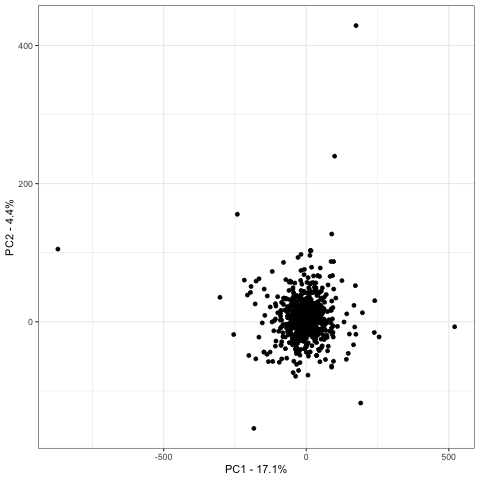

In [9]:
%%R
library(ggplot2)

#
X = pca$x[,1]
Y = pca$x[,2]
pca_data <- data.frame(Names = rownames(pca$x), + X, + Y)
pca_var <- pca$sdev^2
pca_var_per <- round(pca_var / sum(pca_var) * 100, 1)
# Plot
p <- ggplot(data = pca_data, aes(x = X, y = Y))
p <- p + geom_point()
p <- p + xlab(paste0("PC1 - ", pca_var_per[1], "%"))
p <- p + ylab(paste0("PC2 - ", pca_var_per[2], "%"))
p <- p + theme_bw()
print(p)

## UMAP 

In [10]:
%%R
library(umap)
iris.umap = umap(pca$x, n_components = 2, random_state = 47) 

In [11]:
%%R
library(plotly) 
library(umap) 
layout <- iris.umap[["layout"]] 
layout <- data.frame(layout) 
final <- layout

fig <- plot_ly(final, x = ~X1, y = ~X2) 
fig <- fig %>% layout(scene = list(xaxis = list(title = '0'), 
                                     yaxis = list(title = '1'))) 

print(fig)

R[write to console]: 
Присоединяю пакет: ‘plotly’


R[write to console]: Следующий объект скрыт от ‘package:Hmisc’:

    subplot


R[write to console]: Следующий объект скрыт от ‘package:AnnotationDbi’:

    select


R[write to console]: Следующий объект скрыт от ‘package:IRanges’:

    slice


R[write to console]: Следующий объект скрыт от ‘package:S4Vectors’:

    rename


R[write to console]: Следующий объект скрыт от ‘package:ggplot2’:

    last_plot


R[write to console]: Следующий объект скрыт от ‘package:stats’:

    filter


R[write to console]: Следующий объект скрыт от ‘package:graphics’:

    layout


R[write to console]: No trace type specified:
  Based on info supplied, a 'scatter' trace seems appropriate.
  Read more about this trace type -> https://plotly.com/r/reference/#scatter

R[write to console]: No scatter mode specifed:
  Setting the mode to markers
  Read more about this attribute -> https://plotly.com/r/reference/#scatter-mode



# Теперь покрасим по наличию/отсутствию lps

In [20]:
pwd

'/Users/pavellebedev/Yandex.Disk.localized/Cloud_project/Project_2'

In [12]:
%%R
library(stringr)

In [13]:
%%R
files<-list.files(path='split', pattern='.txt', full.names = FALSE)
df_con =  data.frame()
for (fileName in files) {   
    folder <- file.path("split")
    path = file.path(folder, fileName)
    skip_to_next <- FALSE
    tryCatch({ 
        split <-  read.table(path)
        for (i in 1:nrow(split)) {
            skip_to_next <- FALSE
            tryCatch({    # miss errors and continue, if samplew are not in exp
                con = split[7][i,]
                con2 = split[6][i,]
                if (grepl('lps|LPS', con) == TRUE | grepl('lps|LPS', con2) == TRUE  ){
                    result = 'lps'
                } else {
                    result = 'lps-'
                }
                result = c(paste0(fileName, "`_", i), result)
                df_con = rbind(df_con, result)   
        }, error = function(e) { skip_to_next <<- TRUE})
        if(skip_to_next) { next }
            }
    }, error = function(e) { skip_to_next <<- TRUE})
    if(skip_to_next) { next }
    }


In [14]:
%%R
con

[1] "BMDM_R0A//BMDM_R0B//BMDM_R1A//BMDM_R1B//BMDM_R2A//BMDM_R2B//BMDM_R4A//BMDM_R4B//BMDM_R6A//BMDM_R6B//BMDM_T0A//BMDM_T0B//BMDM_T1A//BMDM_T1B//BMDM_T2A//BMDM_T2B//BMDM_T4A//BMDM_T4B//BMDM_T6A//BMDM_T6B//TTP_CLIP_INPUT"


In [15]:
%%R
res = pca$x

In [16]:
%%R
str(df_con)

'data.frame':	1202 obs. of  2 variables:
 $ X.GSE100067.GPL17021_split.txt._1.: chr  "GSE100067-GPL17021_split.txt`_1" "GSE100067-GPL17021_split.txt`_2" "GSE100067-GPL17021_split.txt`_3" "GSE100316-GPL15103_split.txt`_1" ...
 $ X.lps..                           : chr  "lps-" "lps-" "lps-" "lps-" ...


In [17]:
%%R
df_con[1:3, 1]

[1] "GSE100067-GPL17021_split.txt`_1" "GSE100067-GPL17021_split.txt`_2"
[3] "GSE100067-GPL17021_split.txt`_3"


In [18]:
%%R
df_con2 = df_con[df_con[,1] %in% rownames(layout),]

In [19]:
%%R
rownames(df_con2) = df_con2[,1]

In [20]:
%%R
str(df_con2)

'data.frame':	856 obs. of  2 variables:
 $ X.GSE100067.GPL17021_split.txt._1.: chr  "GSE100067-GPL17021_split.txt`_1" "GSE100067-GPL17021_split.txt`_2" "GSE100316-GPL15103_split.txt`_5" "GSE100495-GPL19057_split.txt`_1" ...
 $ X.lps..                           : chr  "lps-" "lps-" "lps-" "lps-" ...


In [31]:
%%R
str(layout)

'data.frame':	899 obs. of  2 variables:
 $ X1: num  -3.672 -2.536 0.216 0.271 0.25 ...
 $ X2: num  -0.701 -0.595 1.294 1.547 0.594 ...


In [21]:
%%R
layout = layout[rownames(layout) %in% df_con2[,1],]

In [22]:
%%R

layout <- iris.umap[["layout"]] 
layout <- data.frame(layout) 
final <- cbind(layout) 

fig <- plot_ly(final, x = ~X1, y = ~X2, color = ~df_con2, colors = c('#636EFA','#00CC96'), type = 'scatter', mode = 'markers')%>%  
  layout(
    plot_bgcolor = "#e5ecf6",
    legend=list(title=list(text='lps_exposure')), 
    xaxis = list( 
      title = "0"),  
    yaxis = list( 
      title = "1")) 
    fig

In [ ]:
%%R
pca = prcomp(df_t, center = FALSE, scale = FALSE, na.action = na.omit)

R[write to console]: Ошибка в svd(x, nu = 0, nv = k) :
  неопределенные или пропущенные значения в 'x'

R[write to console]: Вдобавок: 
R[write to console]: Было 50 или более предупреждений (введите warnings() чтобы просмотреть первые 50)
R[write to console]: 




Ошибка в svd(x, nu = 0, nv = k) :
  неопределенные или пропущенные значения в 'x'


RInterpreterError: Failed to parse and evaluate line 'pca = prcomp(df_t, center = FALSE, scale = FALSE, na.action = na.omit)\n'.
R error message: "Ошибка в svd(x, nu = 0, nv = k) :\n  неопределенные или пропущенные значения в 'x'"

In [25]:
%%R
library(umap)
iris.umap = umap(pca$x, n_components = 2, random_state = 15) 

In [24]:
%%R
library(plotly) 
library(umap) 
layout <- iris.umap[["layout"]] 
layout <- data.frame(layout) 
final <-  merge(layout, df_con2,
                          by = 'row.names', all = TRUE)

fig <- plot_ly(final, x = ~X1, y = ~X2, color = final$X.lps.., colors = c('red','blue')) 
fig <- fig %>% add_markers() 
fig <- fig %>% layout(scene = list(xaxis = list(title = '0'), 
                                     yaxis = list(title = '1'))) 

print(fig)

In [34]:
%%R
colnames(final)

[1] "Row.names"                          "X1"                                
[3] "X2"                                 "X.GSE100067.GPL17021_split.txt._1."
[5] "X.lps.."                           
